In [36]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import scipy.linalg as scila
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags,csr_matrix

# Problem 1

In [43]:
alpha = 2.
beta = 4.
eps = 0.01
N = 100
inv = np.linspace(0,1,N+1)
def analytic_F(x):
    return alpha + x + (beta - alpha - 1.)*((np.exp(x/eps) - 1.)/(np.exp(1./eps)-1))

def fem(N,inv,sparse = False):
    
    cap_phi = [alpha]
    
    h = [inv[1] - inv[0]]
    
    for i in xrange(1,N+1):
        h.append(inv[i] - inv[i-1])
        #This may not be the right size, but I have to test that at the very end. Let's see. 
    
    
    for j in xrange(1,N):
        cap_phi.append(-(1./2)*(h[j] + h[j+1]))
    cap_phi.append(beta)
        
    upp_diag = []
    mid_diag = []
    low_diag = []
    
    for i in xrange(1,N):
        upp_diag.append(eps/h[i-1] - .5)
        mid_diag.append(-eps/h[i-1] - eps/h[i])
        low_diag.append(eps/h[i] + .5)

    upp_diag = [0.] + upp_diag
    mid_diag = [1.] + mid_diag
    mid_diag.append(1.)
    low_diag.append(0.)
    
    if sparse == False:
        upp = np.diag(upp_diag,k=1)
        mid = np.diag(mid_diag,k=0)
        low = np.diag(low_diag,k=-1)

        A = upp + mid + low
        K = scila.solve(A,cap_phi)
        return K
    else:

        upp = spd(upp_diag,diags=1,m=N+1,n=N+1)
        mid = spd(mid_diag,diags=0,m=N+1,n=N+1)
        low = spd(low_diag,diags=-1,m=N+1,n=N+1)
        upp = csr_matrix(upp)
        mid = csr_matrix(mid)
        low = csr_matrix(low)
        
        A = upp + mid + low
        K = spsolve(A,cap_phi)
        return K

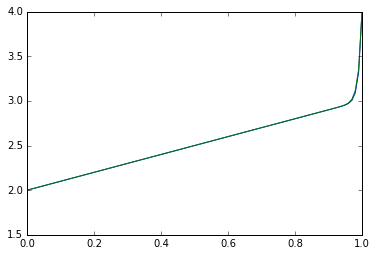

In [44]:
K = fem(N,inv,sparse=False)

#The analytic solution
ana = analytic_F(inv)

plt.plot(inv,K)
plt.plot(inv,ana)
plt.show()

# Problem 2

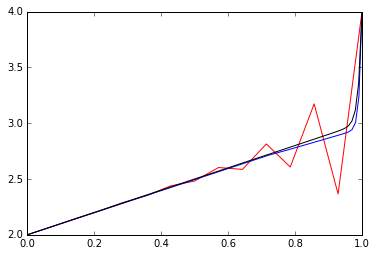

In [45]:
M = 14
even_grid = np.linspace(0,1,M+1)
clustered_grid = np.linspace(0,1,M+1)**(1./8)

K2 = fem(M,even_grid)
K3 = fem(M,clustered_grid)

plt.plot(even_grid,K2, color = 'r')
plt.plot(clustered_grid,K3, color = 'b')
plt.plot(inv,ana, color = 'k')
plt.show()


# Problem 3

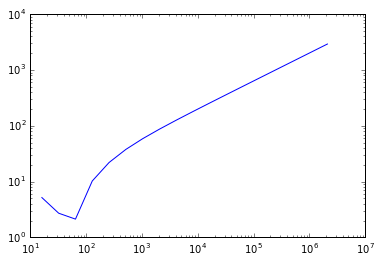

In [53]:
i = np.array([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

N = 2**i
#print N

errors = []

for n in N:
    inv = np.linspace(0,1,n+1)
    ana = analytic_F(inv)
    
    K = fem(n,inv,sparse = True)
    err = la.norm(K-ana)
    errors.append(err)
    
plt.loglog(N,errors)
plt.show()